# Задача о ловушках в орграфе (алгоритмический проект)

## Описание задачи
Назовём *операцией* над орграфом пару из 2 ориентированных рёбер на вершинах этого орграфа, а *применением операции* - добавление этих двух рёбер к орграфу (если их там ещё нет). Определим язык графов с ловушкой GTRAPPED как множество пар из орграфа и набора операций на нём таких, что после применения некоторых операций из набора в графе найдётся такая вершина, что из начальной (первой) вершины до неё есть путь, а обратно - нет.

## Теоретическая часть
- Доказать принадлежность NP
- Доказать NP-трудность, сведением к этой задаче 3-SAT

## Алгоритмическая часть
### Описание алгоритма
1. [Конденсируем](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D0%B1%D1%85%D0%BE%D0%B4%D0%B0_%D0%B2_%D0%B3%D0%BB%D1%83%D0%B1%D0%B8%D0%BD%D1%83_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82_%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D0%B8) орграф
2. Если существует ребро, исходящее из начальной компоненты - return True
3. Удаляем из наборе операций бесполезные (те, у которых оба ребра либо петли, либо уже есть в графе)
4. Если множество операций пусто - return False
5. Выбираем произвольную операцию *u* и рекурсивно запускаем этот алгоритм на том же графе и на графе с применённой опрецией *u*, оба с набором операций уже без *u*. Возвращаем OR от результатов программ. 

### Тестирование алгоритма
- Случайные графы со случайными операциями (в частности, плотные и разреженные графы).
- Реальные данные из игры
- Любые полносвязные графы (по идее, мгновенный ответ без захода в рекурсию)

# Теоретическая часть

### Принадлежность языка NP:

$x \in GTAPPED \iff \exists y R(x,y)$, где $R(x,y)$ возвращает истину, если:
1. $x$ имеет вид (G - орграф на n вершинах, $((u_{11},v_{11}),(u_{12},v_{12})), ..., ((u_{m1},v_{m1}),(u_{m2},v_{m2}))$ - набор из m операций)
2. $y \in \{0,1\}^m$
3. G с применённым к нему заданным в y множестве операций содержит вершину, достижимую из первой, но не наоборот (проверяется конденсацией графа). 

### Сведение 3-SAT к 𝐺𝑇𝐴𝑃𝑃𝐸𝐷

Пусть в 3-SAT формуле n переменных, m дизъюнктов, переменная $x_i$ и её отрицания встречаются $k_i > 0$ раз.
Построим граф с вершинами start, end, $u_0, ..., u_m$, $v_1, ..., v_n$. Проведём рёбра $(start, u_0)$, $(u_n, end)$, $(u_j, start), j=0...m$ и $(v_i,end), i=1...n$. Для каждой переменной $x_i$ заведём операции ${d_i}^l$, $l=1...k_i$. Операцию ${d_i}^l$ определим так: пусть $l$-тое вхождение x лежит в $j$-том предикате. Первое ребро в ${d_i}^l$ будет $(u_{j-1}, u_j)$. Далее, если $l$-тое вхождение x без отрицания, то второе ребро - $(end, v_i)$, иначе $(v_i, start)$.

#### 1. Если формула выполнима, то найдётся набор операций т. ч. после их применения end достижим из start, но не наоборот.

Пусть $(X_1, ..., X_n)$ - выполняющий набор. Возьмём те операции ${d_i}^l$, для которых при подстановке $X_i$ в $l$-тое вхождение $x_i$ получается 1. Тогда есть путь из $start$ в $end$, т.к. $\forall j$ в $j$-том дизъюнкте есть переменная/её отрицание, принимающая знаение 1, следовательно соответствующая этому её вхождению операция применена, следовательно есть ребро $(u_{j-1},u_j)$. С другой стороны, если бы был путь из $end$ в $start$, то для какого-то $i$ существовали бы рёбра $(end, v_i)$ и $(v_i, start)$, что возможно только если были применены операции, соответствующие вхождению переменной как без отрицания, так и с, а такого не может быть.

#### 2. Если существует набор, при применении которого найдётся путь из start до какой-то вершины, но не наоборот, то существует выполняющий набор для формулы.

Заметим, что если для какой-то переменной $x_i$ одновременно войдут операции, соответстующие вхождению этой переменной без отрицания и с отрицанием, то добавятся рёбра $(end, v_i)$ и $(v_i, start)$, и $start$ станет достижимым из всех вершин. Следовательно, такого не может быть. Тогда можно корректно определить выполняющий набор так: $X_i=1(0)$, если все применённые ${d_i}^l$ соответствуют вхождению $x_i$ без отрицания (с отрицанием). Если ни для какого $l$ ${d_i}^l$ не применилась, то $X_i$ можно положить любым. Т.к. существует путь от старта до какой-то вершины без ребра в старт, для любого $j=1...m$ будет добавлено ребро $(u_{j-1},u_j)$. Следовательно, для каждого дизъюнкта будет применена хотя бы одна из трёх операций, соответствующих ему, следовательно, соответствующая этой операции переменная будет выполнять дизъюнкт.

#### Пример

Формула: $(x_1 \lor x_2 \lor \overline{x_3}) \land (\overline{x_2} \lor \overline{x_3} \lor x_4)$

Выполняющий набор: (1,0,1,0).

Зелёным обозначены добавленные рёбра, красным - не добавленные.

![](img1.png "Title")

# Алгоритмическая часть

In [1]:
%run Graph.ipynb

## Тестирование скорости

### Случайные графы со случайными операциями

In [2]:
import timeit
from random import randint, seed
from tqdm import tqdm

In [3]:
def testRandomGraph(n, m, p, num_tests):
    sum_time = 0
    for i in range(num_tests):
        g = Graph(n)
        adj = np.random.binomial(1, p, size=(n,n))
        g.setAdjMatrix(adj)
        ops = []
        for j in range(m):
            ops.append(((randint(0,n-1),randint(0,n-1)),(randint(0,n-1),randint(0,n-1))))
        sum_time += timeit.timeit(lambda: isTrapped(g, ops), number=1)
    return sum_time / num_tests

### Обозначения

n - количество вершин

m - количество операций

p - вероятность каждого из рёбер

#### m = n, p = 1/n

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [04:56<00:00, 14.83s/it]


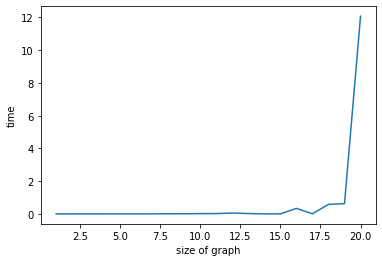

In [4]:
import matplotlib.pyplot as plt

seed(24)
np.random.seed(24)
grid1 = range(1,21,1)
times1 = [testRandomGraph(n,n,1/n,20) for n in tqdm(grid1)]
plt.plot(grid1, times1)
plt.xlabel('size of graph')
plt.ylabel('time')
plt.show()

Экспоненциальный рост. В достаточно разреженном графе приходится перебирать почти все возможные комбинации операций.

#### m = 3, p = 1/n

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.75it/s]


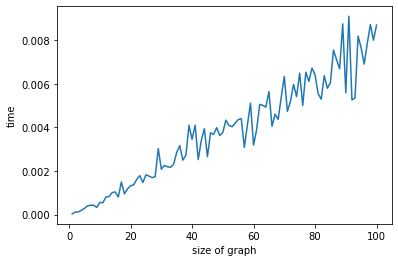

In [5]:
import matplotlib.pyplot as plt

seed(24)
np.random.seed(24)
grid2 = range(1,101,1)
times2 = [testRandomGraph(n,3,1/n,100) for n in tqdm(grid2)]
plt.plot(grid2, times2)
plt.xlabel('size of graph')
plt.ylabel('time')
plt.show()

Примерно линейная скорость, т.к. требуется перебирать не более $2^5$ вариантов

#### m = n, p = $\frac{\ln{n}}{n}$ (фазовый переход графа к связному (наверное))

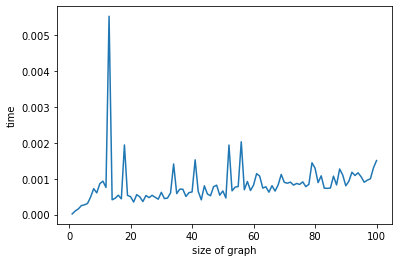

In [6]:
import matplotlib.pyplot as plt
import math

seed(24)
np.random.seed(24)
grid3 = range(1,101,1)
times3 = [testRandomGraph(n,n,math.log(n)/n,300) for n in tqdm(grid3)]
plt.plot(grid3, times3)
plt.xlabel('size of graph')
plt.ylabel('time')
plt.show()

В среднем линейное время, т.к. граф часто получается связным, и из-за этого алгоритм завершается за 1 шаг. Выбросы соответствуют неудачным графам, в которых было много компонент.

#### m = n, p = $\frac{2\ln{n}}{n}$ (фазовый переход графа к связному (наверное))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:23<00:00,  1.20it/s]


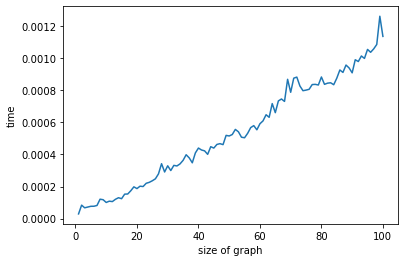

In [7]:
import matplotlib.pyplot as plt
import math

seed(24)
np.random.seed(24)
grid4 = range(1,101,1)
times4 = [testRandomGraph(n,n,2*math.log(n)/n,300) for n in tqdm(grid4)]
plt.plot(grid4, times4)
plt.xlabel('size of graph')
plt.ylabel('time')
plt.show()

Опять линейное - граф только плотнее. Но сдесь меньше дисперсия, т. к. граф связен чаще.

#### m = n, p = 0.1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:04<00:00,  1.25s/it]


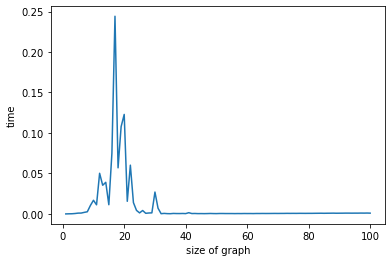

In [9]:
import matplotlib.pyplot as plt
import math

seed(24)
np.random.seed(24)
grid5 = range(1,101,1)
times5 = [testRandomGraph(n,n,0.1,100) for n in tqdm(grid5)]
plt.plot(grid5, times5)
plt.xlabel('size of graph')
plt.ylabel('time')
plt.show()

При небольших n граф разреженный, поэтому возникают проблемы, но при больших n алгоритм линеен

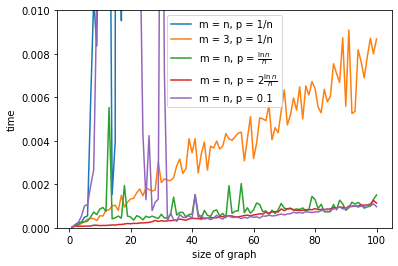

In [24]:
plt.plot(grid1, times1, label='m = n, p = 1/n')
plt.plot(grid2, times2, label='m = 3, p = 1/n')
plt.plot(grid3, times3, label=r'm = n, p = $\frac{\ln{n}}{n}$')
plt.plot(grid4, times4, label=r'm = n, p = $2\frac{\ln{n}}{n}$')
plt.plot(grid5, times5, label='m = n, p = 0.1')
plt.xlabel('size of graph')
plt.ylabel('time')
plt.ylim(0, 0.01)  
plt.legend()
plt.show()

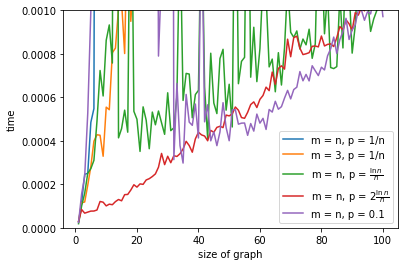

In [25]:
plt.plot(grid1, times1, label='m = n, p = 1/n')
plt.plot(grid2, times2, label='m = 3, p = 1/n')
plt.plot(grid3, times3, label=r'm = n, p = $\frac{\ln{n}}{n}$')
plt.plot(grid4, times4, label=r'm = n, p = $2\frac{\ln{n}}{n}$')
plt.plot(grid5, times5, label='m = n, p = 0.1')
plt.xlabel('size of graph')
plt.ylabel('time')
plt.ylim(0, 0.001)  
plt.legend()
plt.show()

У последних трёх скорость при больших n примерно одинаковая, потому что граф чаще всего полносвязен, поэтому они завершаются за одну итерацию.